In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [3]:
run main_NLED31213

<IPython.core.display.Javascript object>


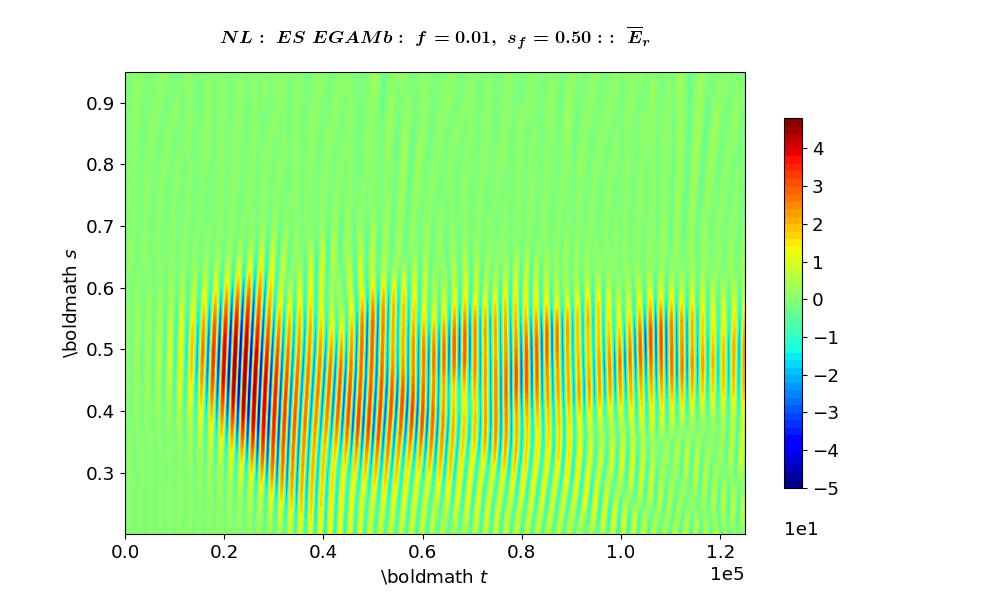

<IPython.core.display.Javascript object>


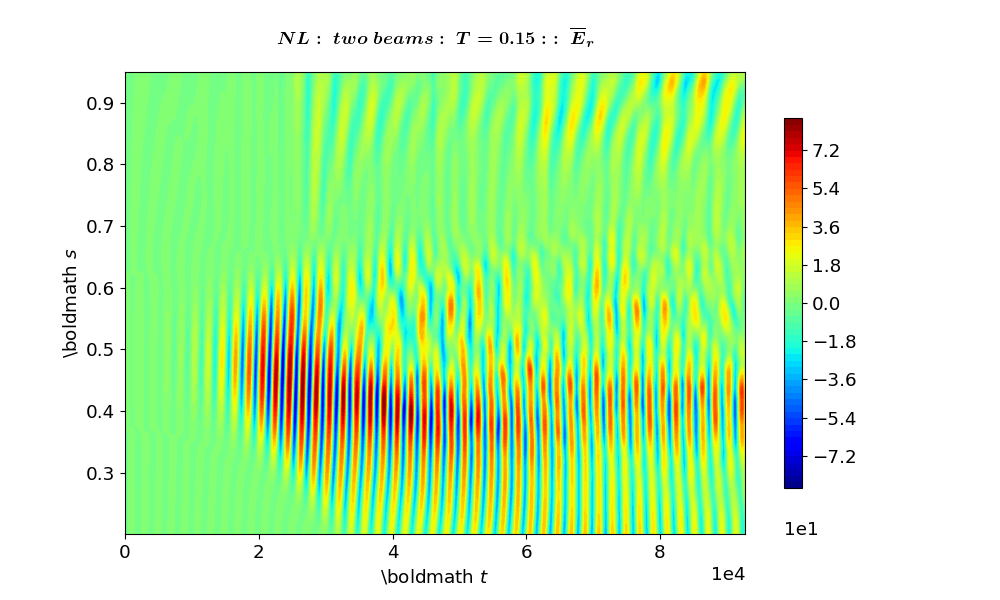

<IPython.core.display.Javascript object>


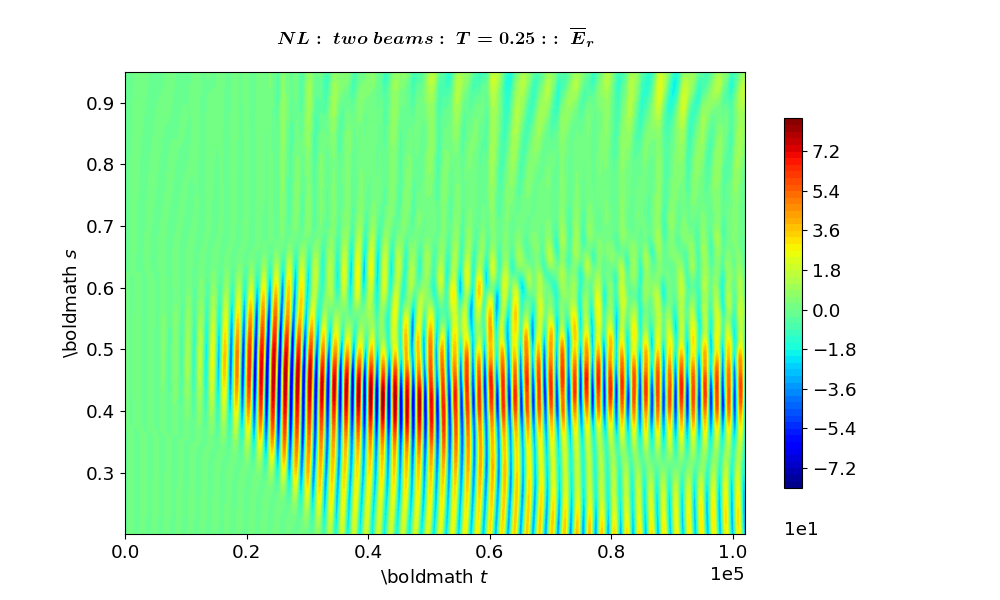

In [5]:
# **********************
# *** ZONAL along ts ***
# **********************
reload()

npr = 3
oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
#     'dds': [nb025_v60_T04, nb025_v60_T06, nb025_v60_T08, nb025_v60_T10],
#     'dds': [nb025_f001, nb025_f002, nb025_f003, nb025_f005, nb025_f009],
    'dds': [nb025_f001_v7, nb025_f001_v75, nb025_f001_v9],
#     'dds': [nb025_f001, nb025_f009_v3],
#     'var_legs1': ['\overline{E}_r:\ f = 0.010, v_{\parallel} = 8.0, T_f = 1.0'],
#     'var_legs2': ['\overline{E}_r:\ f = 0.095, v_{\parallel} = 3.5, T_f = 0.2'],
}
oo_ts.update({
    't_end': 1.25e5,
    's_start': 0.2,
})
common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


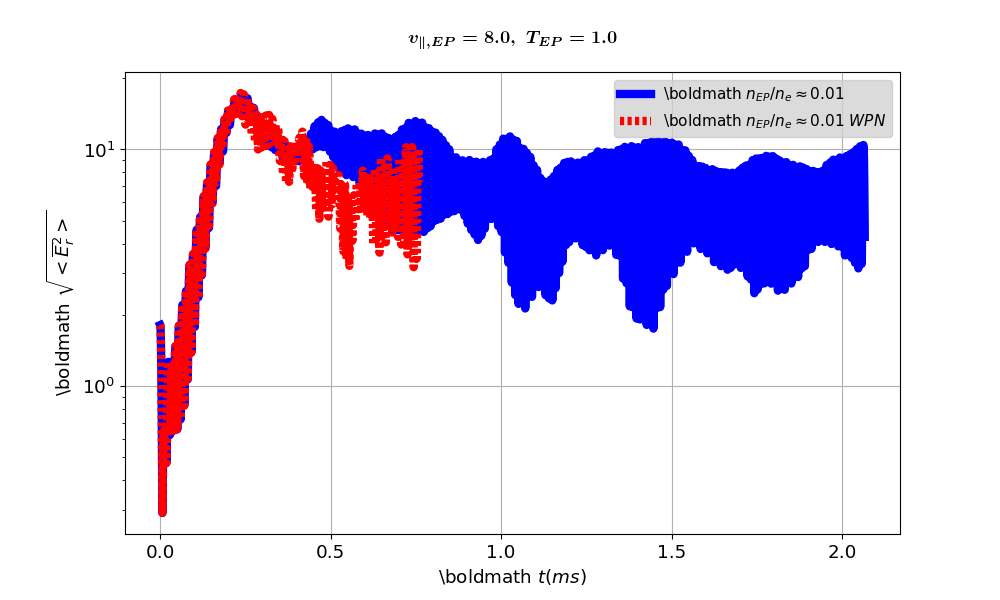

In [24]:
# ****************************
# *** ZONAL: s-structure at t1 ***
# ****************************
reload()


# # -----------------------------------------------
# # --- SCAN ON T: f = 0.01, v = 6.0, sf = 0.50 ---
# # -----------------------------------------------
# dds = [nb025_v60_T04, nb025_v60_T06, nb025_v60_T08, nb025_v60_T10]
# tit_plot = 'n_{EP}/n_e \\approx 0.01,\ v_{\parallel, EP} = 6.0'
# var_legs = ['T_{EP} = 0.4', 'T_{EP} = 0.6', 'T_{EP} = 0.8', 'T_{EP} = 1.0']
# labx, laby = 't', '\sqrt{<\overline{E}_r^2>}'
# sel_norm = 't-mili-seconds'

# ovars = [['zonal', 'erbar']] * len(dds)
# avrs = [ ['ts', 'rms-s', [[0,1]] ] ] * len(dds)


# -----------------------------------
# --- SCAN ON f: T = 1.0, v = 8.0 ---
# -----------------------------------
# dds = [nb025_f005, nb025_f002, nb025_f009, nb025_f001, nb025_f0004]
# dds = [nb025_f005, nb025_f004, nb025_f003]
dds = [nb025_f001, nb025_f001_wp]
tit_plot = 'v_{\parallel, EP} = 8.0,\ T_{EP} = 1.0'
var_legs = [
#     'n_{EP}/n_e \\approx 0.05',           
#     'n_{EP}/n_e \\approx 0.02',
#     'n_{EP}/n_e \\approx 0.09',
#     'n_{EP}/n_e \\approx 0.01',  
#     'n_{EP}/n_e \\approx 0.004', 
    
#     'n_{EP}/n_e \\approx 0.05',            
#     'n_{EP}/n_e \\approx 0.04', 
#     'n_{EP}/n_e \\approx 0.03',
    
    'n_{EP}/n_e \\approx 0.01',            
    'n_{EP}/n_e \\approx 0.01\ WPN', 
]
labx, laby = 't', '\sqrt{<\overline{E}_r^2>}'
sel_norm = 't-mili-seconds'

ovars = [['zonal', 'erbar']] * len(dds)
avrs = [ ['ts', 'rms-s', [[0,1]] ] ] * len(dds)

# # ------------------------------------
# # --- SCAN ON vp: T = 1.0, v = 8.0 ---
# # ------------------------------------
# dds = [nb025_f001_v9, nb025_f001_v75, nb025_f001_v7]
# tit_plot = 'T_{EP} = 1.0,\ n_{EP}/n_e \\approx 0.01'
# var_legs = [
#     'v_{\parallel, EP} = 9.0', 
#     'v_{\parallel, EP} = 7.5',
#     'v_{\parallel, EP} = 7.0',              
# ]
# labx, laby = 't', '\sqrt{<\overline{E}_r^2>}'
# sel_norm = 't-mili-seconds'

# ovars = [['zonal', 'erbar']] * len(dds)
# avrs = [ ['ts', 'rms-s', [[0,1]] ] ] * len(dds)


# # -----------------------------------
# # --- TWO BEAMS ---
# # -----------------------------------
# dds = [nb025_f001, nb025_b2_T15, nb025_b2_T25]
# tit_plot = 'TWO\ BEAMS'
# var_legs = [
#     'n_{EP}/n_e \\approx 0.01, v = 8.0,\ T = 1.0',           
#     'T_2 = 0.15',
#     'T_2 = 0.25',
# ]
# labx, laby = 't', '\sqrt{<\overline{E}_r^2>}'
# sel_norm = 't-mili-seconds'

# ovars = [['zonal', 'erbar']] * len(dds)
# avrs = [ ['ts', 'rms-s', [[0,1]] ] ] * len(dds)


# --- PLOTTING ---
oo_t_s1 = {
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'sel_norm': sel_norm,
    'flag_semilogy': True,
    'stys': ['-', ':', ':', ':', '-'],
    'labx': labx,
    'laby': laby,
    'var_legs1': [var_legs[0]],
    'var_legs2': [var_legs[1]],
#     'var_legs3': [var_legs[2]],
#     'var_legs4': [var_legs[3]],
#     'var_legs5': [var_legs[4]],
    'tit_plot':  tit_plot,
#     'x_end': 1.25e5,
}
common.plot_vars_1d(oo_t_s1)

In [ ]:
# ***************************************************
# *** ZONAL: s-localisations of the EGAMs in time ***
# ***************************************************
reload()

# # -----------------------------------------------
# # --- SCAN ON T: f = 0.01, v = 6.0, sf = 0.50 ---
# # -----------------------------------------------
# dds = [nb025_v60_T04, nb025_v60_T06, nb025_v60_T08, nb025_v60_T10]
# # dds = [nb025_v60_T04]
# tit_plot = 'n_{EP}/n_e \\approx 0.01,\ v_{\parallel, EP} = 6.0'
# var_legs = ['T_{EP} = 0.4', 'T_{EP} = 0.6', 'T_{EP} = 0.8', 'T_{EP} = 1.0']
# labx, laby = 't', 's\ of\ \overline{E}_r\ absolute\ maximums'
# sel_norm = 't-mili-seconds'
# name_axis_loc = 's'

# ovars = [['zonal', 'erbar']] * len(dds)
# avrs = [ ['ts'] ] * len(dds)

# -----------------------------------
# --- SCAN ON f: T = 1.0, v = 8.0 ---
# -----------------------------------
dds = [nb025_f005, nb025_f002, nb025_f009, nb025_f001, nb025_f0004]
tit_plot = 'v_{\parallel, EP} = 8.0,\ T_{EP} = 1.0'
var_legs = [
    'n_{EP}/n_e \\approx 0.05',           
    'n_{EP}/n_e \\approx 0.02',
    'n_{EP}/n_e \\approx 0.09',
    'n_{EP}/n_e \\approx 0.01',  
    'n_{EP}/n_e \\approx 0.004', 
]
labx, laby = 't', 's\ of\ \overline{E}_r\ absolute\ maximums'
sel_norm = 't-mili-seconds'

ovars = [['zonal', 'erbar']] * len(dds)
avrs = [ ['ts'] ] * len(dds)

# --- PLOTTING ---
oo_localisations_t = {
    'ovars': ovars,
    'avrs': avrs,
    'dds': dds,
    'name_axis_loc': name_axis_loc,
    'sel_norm': sel_norm,
    'stys': ['o', 's', '^', 'p', 'x'],
    'labx': labx,
    'laby': laby,  
    'var_legs1': [var_legs[0]],   
    'var_legs2': [var_legs[1]],
    'var_legs3': [var_legs[2]],
    'var_legs4': [var_legs[3]],
    'var_legs5': [var_legs[4]],
    'tit_plot':  tit_plot,
    't_end': 1.25e5,
}
common.plot_vars_1d_localisation(oo_localisations_t)

Calculation: f = 0.095,\ v = 3.5,\ T = 0.2


c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\minpack.py:799: OptimizeWarning:

Covariance of the parameters could not be estimated



Advanced fitting with dynamic rate failed.


D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5\ymath.py:76: RuntimeWarning:

invalid value encountered in log

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:268: RuntimeWarning:

Mean of empty slice.

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:273: RuntimeWarning:

Mean of empty slice.

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1721: RuntimeWarning:

invalid value encountered in greater

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:897: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_

Advanced fitting with dynamic rate failed.


D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5\common.py:1277: RuntimeWarning:

overflow encountered in exp

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5\common.py:1277: RuntimeWarning:

overflow encountered in multiply

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning:

invalid value encountered in subtract

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning:

invalid value encountered in add

c:\users\ivan\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:242: RuntimeWarning:

invalid value encountered in subtract

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5\ymath.py:181: RuntimeWarning:

overflow encountered in multiply

D:\Work-Projects\MyProgs\PyWorkScripts\PyDiagORB5\ymath.py:125: RuntimeWarning:

invalid value encountered in multiply

D:\Work-Projects\MyProgs\PyWorkScripts\PyDi

Advanced fitting with dynamic rate failed.


<IPython.core.display.Javascript object>


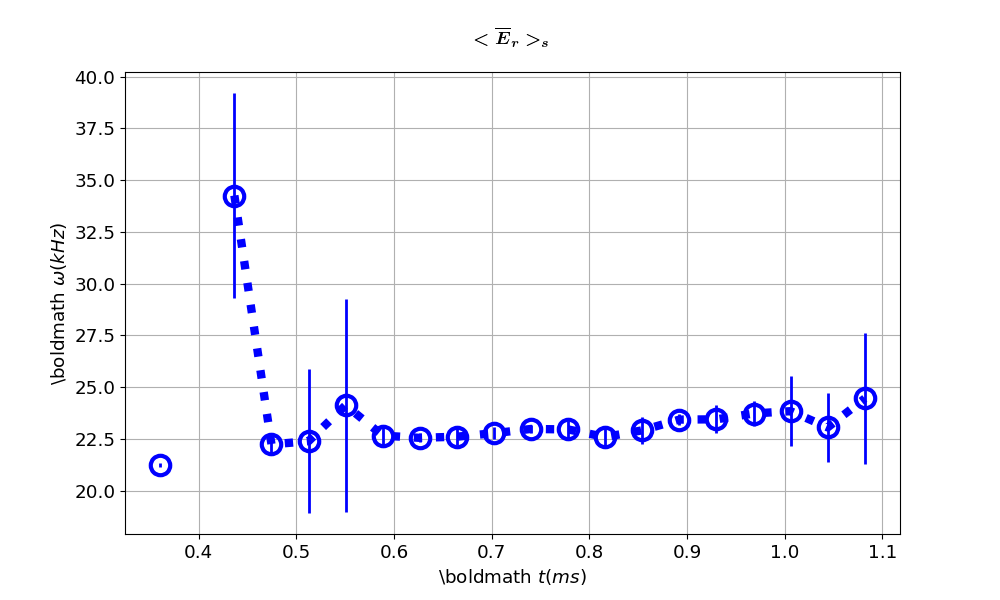

In [10]:
# *************************************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) as a function of TIME ***
# *************************************************************************
reload()

s1_q = 0.50

# dd_current, s1, tmin, tmax = dict(nb025_f001), 0.50, 4e3, 2.07e5
# # name_conf = 'EGAMb:\ f = 0.01,\ v_{parallel,f} = 8.0,\ full\ NL'
# name_conf = 'f = 0.01'
# width_t, n_samples = 8.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f001_wp), 0.50, 4e3, 8.0e4
# name_conf = 'EGAMb:\ f = 0.01,\ v_{parallel,f} = 8.0,\ wave-EP\ NL'
# width_t, n_samples = 6.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f0004), 0.40, 4e3, 1.35e5
# width_t, n_samples = 8.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f005), 0.64, 4e3, 1.35e5
# name_conf = 'f = 0.05'
# width_t, n_samples = 8.0e3, 100

# dd_current, s1, tmin, tmax = dict(nb025_f009_v3), 0.50, 3e4, 1.35e5
# name_conf = 'f = 0.095,\ v = 3.0,\ T = 0.2'
# width_t, n_samples = 1.6e4, 100

dd_current, s1, tmin, tmax = dict(nb025_f009_v35), 0.50, 3e4, 1.25e5
name_conf = 'f = 0.095,\ v = 3.5,\ T = 0.2'
width_t, n_samples = 1.6e4, 100


sel_norm_w = 'kHz'
sel_norm_t = 's'

species_name = 'fast'
flag_fv = False
flag_je = False
n_analyt_vres = 2

step_t = width_t/4.
min_n_peaks, threshold_w, threshold_g = 4, 0.02, 0.1
flag_inc_boundary = False
filt_global = None

oo_var_init = {
    'ovars': [['zonal', 'erbar']],
#     'avrs': [['ts', 'point-s', [s1]]],
    'avrs': [  [ 'ts', 'mean-s', [[0,1]] ]  ],
    'dds': [dd_current],
}
oo_wg_init = {
    # BASIC 
    'sel_wg': 'wg-adv',
    'flag_two_stages': True,
    # FILTERING
    'filt_global': filt_global,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
}
oo_t_init = {
    'species_name': species_name,
    'tmin': tmin, 'tmax': tmax,
    'width_t': width_t,
    'step_t': step_t,
    'flag_fv': flag_fv,
    'flag_je': flag_je,
    's1_q': s1_q,
    'n_analyt_vres': n_analyt_vres,
}
oo_plot = {
#     'tit_plot': '\overline{E}_r' + '(s = {:0.2f})'.format(s1),
    'tit_plot': '<\overline{E}_r>_s',
    'stys_plot': ['o:', 's:', '^:'],
    'sel_norm_w': sel_norm_w,
    'sel_norm_t': sel_norm_t,
    'vpar_start': 4.3, 'vpar_end': 8.3,
#     'vpar_start': 2, 'vpar_end': 4 
}

# Create arrays of parameters
oo_vars, oo_wgs, oo_ts, conf_names = [], [], [], []

def new_conf(name, oo_vars, oo_wgs, oo_ts, conf_names):
    conf_names.append(name)
    oo_ts.append(dict(oo_t_init))
    oo_vars.append(dict(oo_var_init))
    oo_wgs.append(dict(oo_wg_init))
    
    return oo_ts[-1], oo_vars[-1], oo_wgs[-1]

# - 1st configuration -
oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# # - 2nd configuration -
# name_conf = 'f = 0.0949'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f009],
# })

# # - 3rd configuration -
# name_conf = 'f = 0.01'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f001],
# })

# # - 4th configuration -
# name_conf = 'f = 0.004'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f0004],
# })



# # - 2nd configuration -
# name_conf = 'EGAMb:\ f = 0.01,\ v_{parallel,f} = 7.0'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f001_v7],
# })

# # - 3rd configuration -
# name_conf = 'EGAMb:\ f = 0.01,\ v_{parallel,f} = 9.0'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f001_v9],
# })

# # - 2nd configuration -
# name_conf = 'EGAMb:\ f = 0.004,\ v_{parallel,f} = 8.0'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f0004],
# #     'avrs': [['ts', 'point-s', [0.40]]]
#     'avrs': [ ['ts', 'mean-s', [[0,1]]] ] 
# })
# oo_t_current.update({
#     'tmin': 4e3, 'tmax': 1.35e5,
# })

# # - 3rd configuration -
# name_conf = 'EGAMb:\ f = 0.05,\ v_{parallel,f} = 8.0'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({
#     'dds': [nb025_f005],
# #     'avrs': [ ['ts', 'point-s', [0.64]] ]
#     'avrs': [ ['ts', 'mean-s', [[0,1]]] ]
# })
# oo_t_current.update({
#     'tmin': 4e3, 'tmax': 1.35e5,
# })


# # - 2nd configuration -
# name_conf = 'EGAMb:\ wave-EP\ NL'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nb025_f001_mpr_wp]})

# # - 2nd configuration -
# name_conf = 'EGAMm:\ N=1e8'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_N1e8]})

# # - 3rd configuration -
# name_conf = 'EGAMm:\ dt=10'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_dt10]})

# # - 4th configuration -
# name_conf = 'EGAMm:\ ns=256'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)
# oo_var_current.update({'dds': [nm025_f001_ns256]})

# # ---
# # - 2nd configuration -
# name_conf = 'EGAMb:\ s = 0.35'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# oo_var_current.update({ 'avrs': [['ts', 'point-s', [0.35]]] })

# # ---
# # - 3rd configuration -
# name_conf = 'EGAMb:\ s = 0.25'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# oo_var_current.update({ 'avrs': [['ts', 'point-s', [0.25]]] })

# # ---
# # - 2nt configuration -
# name_conf = 'EGAMm'
# oo_t_current, oo_var_current, oo_wg_current = new_conf(name_conf, oo_vars, oo_wgs, oo_ts, conf_names)

# dd_current2 = dict(nm025_f001_mpr)
# width_t, n_samples = 6e3, 80
# step_t = width_t/2

# oo_t_current.update({'width_t': width_t, 'step_t': step_t})
# oo_wg_current.update({'n_samples': n_samples})
# oo_var_current.update({'dds': [dd_current2]})

# ---
# -- SET of configurations --
oo_wg_t = {
    'conf_names': conf_names,
    'oo_ts':   oo_ts,
    'oo_vars': oo_vars,
    'oo_wgs':  oo_wgs,
}

# Calculation
common.calc_wg_t(oo_wg_t, oo_plot)

<IPython.core.display.Javascript object>


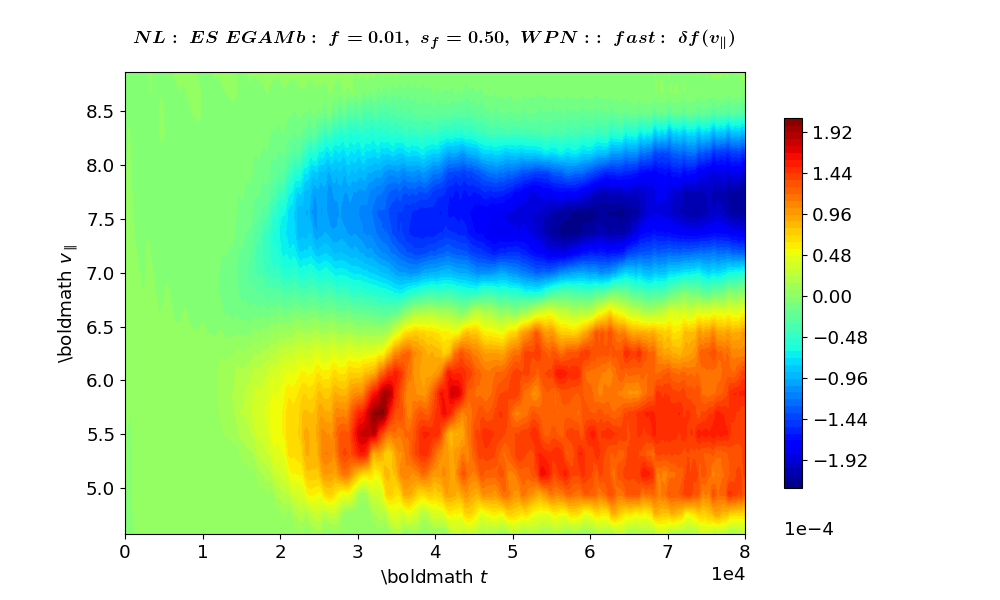

<IPython.core.display.Javascript object>


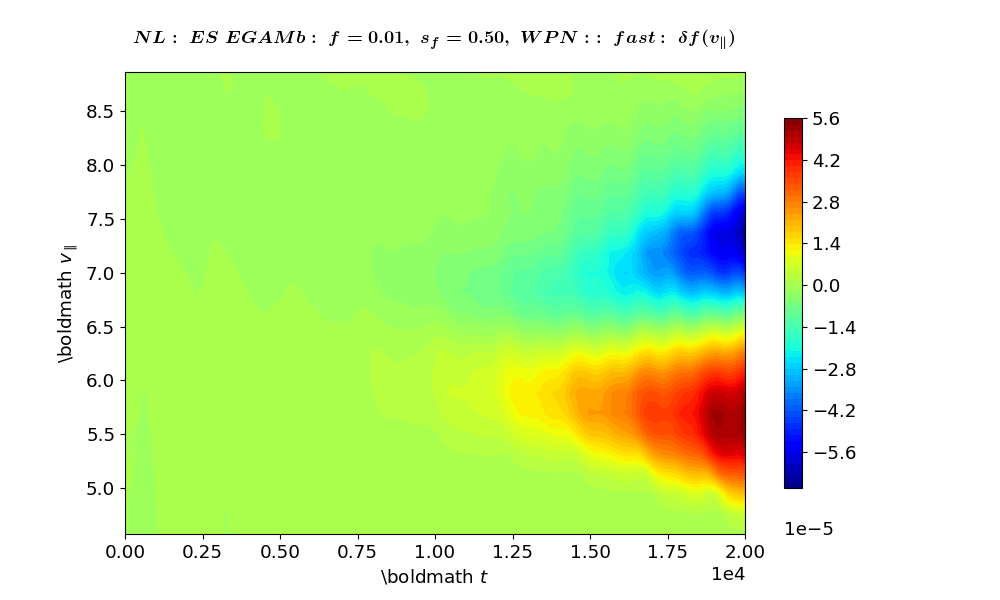

In [8]:
# *****************************
# *** DISTRIBUTION (t,vpar) ***
# *****************************
reload()

npr = 1

oo_tvpar = {
    'ovars': [
        ['distribution', 'df_vel_1d', 'fast'], 
    ] * npr,
    'avrs': [
        ['tvpar']
    ] * npr,
    'dds': [nb025_f001],
}

oo_tvpar.update({
#      't_start': 3e4,
     'vpar_start': 4.5, 'vpar_end': 9.0,
})
common.plot_vars_2d(oo_tvpar)

# oo_tvpar.update({
#      't_end': 2e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
# })
# common.plot_vars_2d(oo_tvpar)

<IPython.core.display.Javascript object>


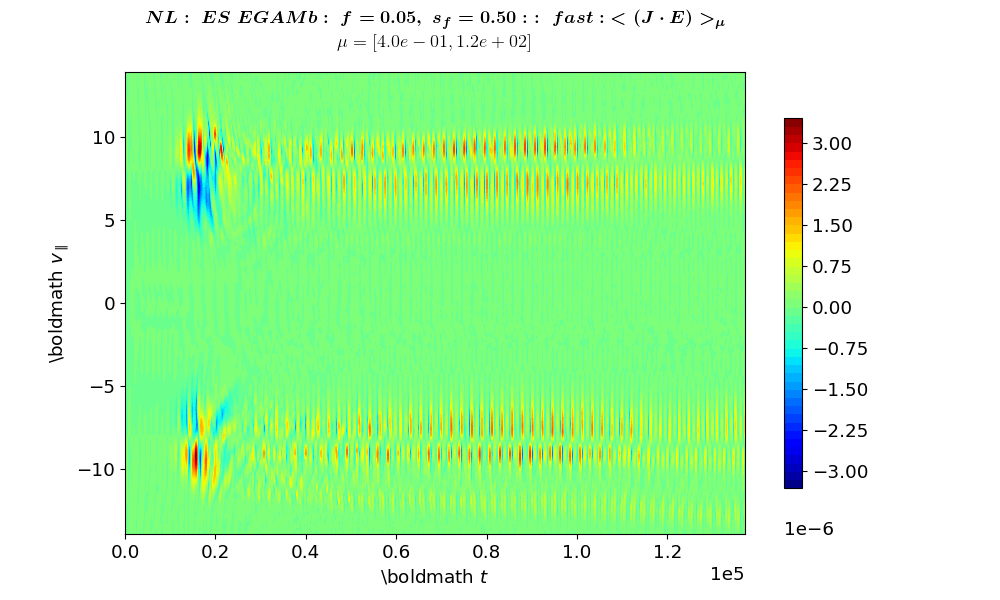

In [24]:
# *****************************
# *** MPR (t,vpar) ***
# *****************************
reload()

npr = 1

oo_tvpar = {
    'ovars': [
        ['mpr', 'je', 'fast'], 
    ] * npr,
    'avrs': [
        ['tvpar']
    ] * npr,
    'dds': [nb025_f005],
}

oo_tvpar.update({
# #      't_start': 3e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
})
common.plot_vars_2d(oo_tvpar)

# oo_tvpar.update({
#      't_end': 2e4,
#      'vpar_start': 4.5, 'vpar_end': 9.0,
# })
# common.plot_vars_2d(oo_tvpar)

<IPython.core.display.Javascript object>


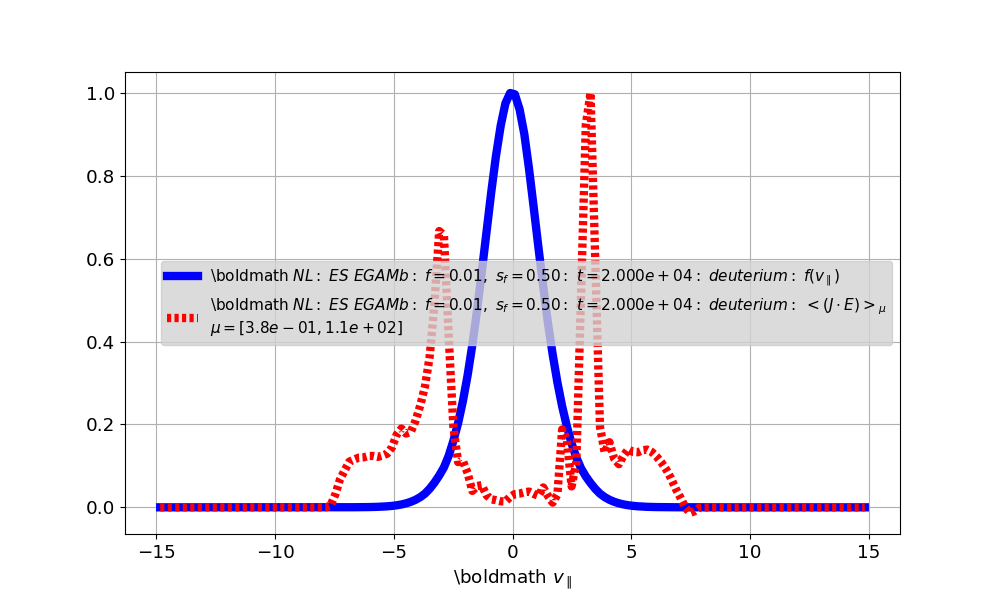

In [16]:
# *********************************
# *** DISTRIBUTION (vpar) at t1 ***
# *********************************
reload()

species_name = 'deuterium'
t_points = [2e4]

oo_vpar_t1 = {
    'ovars': [
        ['distribution', 'f_vel_1d', species_name], 
        ['mpr', 'je', 'deuterium'],
    ],
    'avrs': [
        ['tvpar', 'point-t', t_points]
    ] * 2,
    'dds': [nb025_f001_mpr] * 2,
    'stys': ['-', ':', ':', ':', ':', ':', ':'],
    'labx': 'v_{\parallel}',
    'flag_norm': True,
}
common.plot_vars_1d(oo_vpar_t1)

<IPython.core.display.Javascript object>


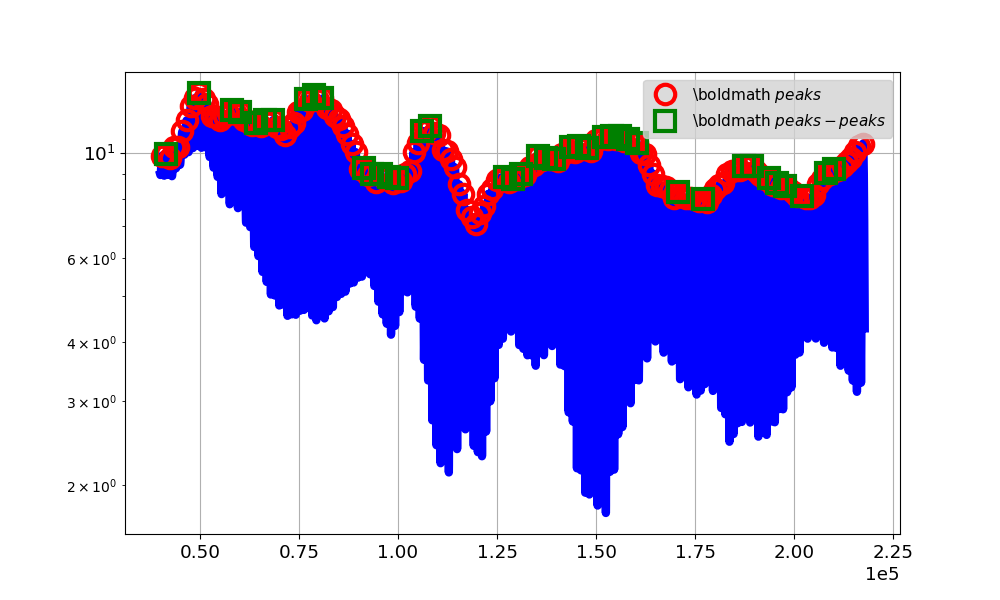

<IPython.core.display.Javascript object>


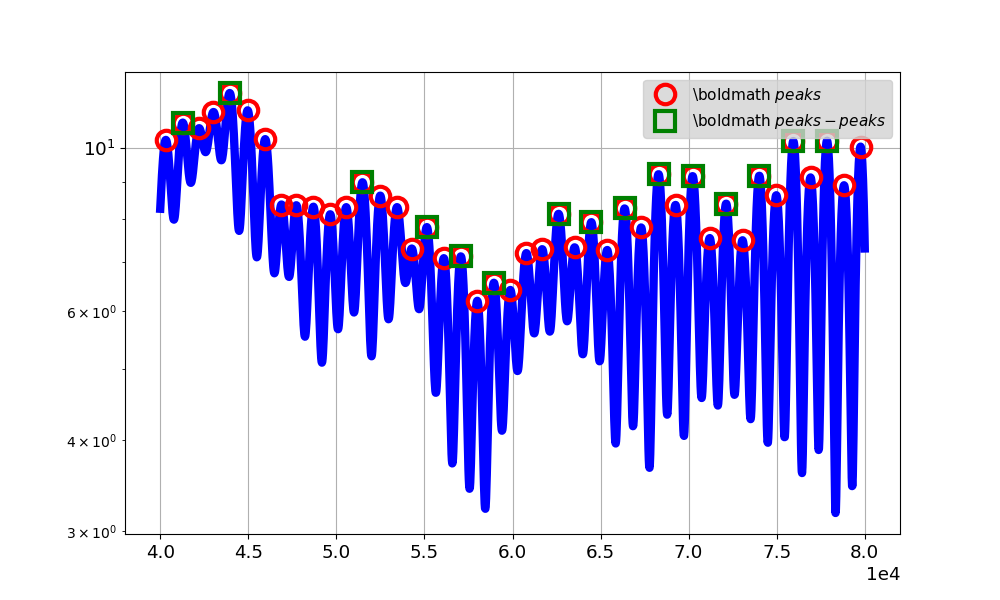

NL:\ ES\ EGAMb:\ f = 0.01,\ s_f = 0.50:\ rms_s:\ s = [0.000, 0.950]:\ \overline{E}_r:\ [4.000e+04, 2.178e+05]:\ 1.017e+01 +- 2.172e+00
NL:\ ES\ EGAMb:\ f = 0.01,\ s_f = 0.50,\ WPN:\ rms_s:\ s = [0.000, 0.950]:\ \overline{E}_r:\ [4.000e+04, 8.000e+04]:\ 8.930e+00 +- 1.905e+00


In [23]:
# *************************
# *** SATURATION LEVELS ***
# *************************
reload()

npr = 2

oo_saturation = {
    'ovars': [
        ['zonal', 'erbar'],
    ] * npr,
    'avrs': [
        ['ts', 'rms-s', [[0,1]] ],
    ] * npr,
    'dds': [nb025_f001, nb025_f001_wp],
    'oo_operations': [
        ['abs-peaks-peaks-mean', [4e4, 3.0e5]]
    ] * npr
}
common.get_value_signal(oo_saturation)

In [10]:
from ip_projects import NLED_scans

<IPython.core.display.Javascript object>


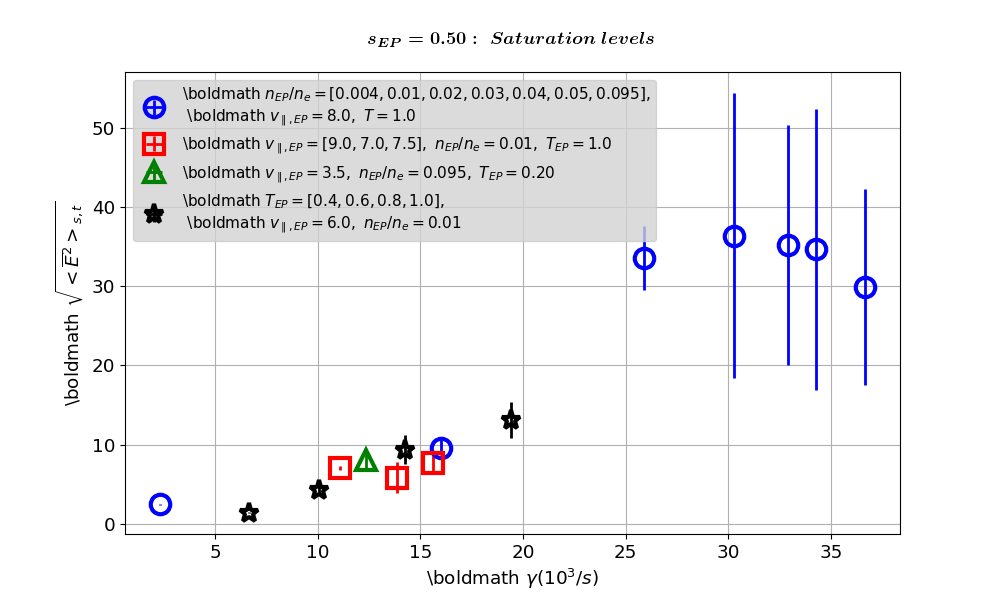

In [21]:
# **********************
# *** SCAN ON F_PART ***
# **********************
mix.reload_module(NLED_scans)
NLED_scans.es_egam_satur_scan({'sel_norm_x': 'inv-s', 'dd': nb025_f001})